# CRIME PREDICTION BASED ON CRIME TYPES FOR DENVER

###  Dataset : https://www.kaggle.com/paultimothymooney/denver-crime-data

#### This dataset represents the real-world crimes in Denver, Colorado. It includes criminal offences and crime incidents in the city and county of the city for the previous five calendar years in addition to the current year (2014 - 2019).The dataset information is based on the National Incident Based Reporting System (NIBRS). This dataset is composed of 19 attributes with 521749 instances. The key attributes provide the offence type and its category such as robbery,public-disorder, and sexual assault. The dataset also gives the exact occurrence time of the crime along with the district, the neighbourhood and the exact geographic location.

In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
import seaborn as sns
from sklearn import preprocessing
# To model the Gaussian Navie Bayes classifier
from sklearn.naive_bayes import GaussianNB
# To calculate the accuracy score of the model
from sklearn.metrics import accuracy_score

In [2]:
crime_dataset=pd.read_csv("C://Users/hp/Documents/Final_project_python_for_data_scieence/crime.csv")

In [3]:
crime_dataset

,INCIDENT_ID,OFFENSE_ID,OFFENSE_CODE,OFFENSE_CODE_EXTENSION,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,FIRST_OCCURRENCE_DATE,LAST_OCCURRENCE_DATE,REPORTED_DATE,INCIDENT_ADDRESS,GEO_X,GEO_Y,GEO_LON,GEO_LAT,DISTRICT_ID,PRECINCT_ID,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
0,2016376978,2016376978521300,5213,0,weapon-unlawful-discharge-of,all-other-crimes,6/15/2016 11:31:00 PM,NaN,6/15/2016 11:31:00 PM,NaN,3193983.0,1707251.0,-104.809881,39.773188,5,521,montbello,1,0
1,20186000994,20186000994239900,2399,0,theft-other,larceny,10/11/2017 12:30:00 PM,10/11/2017 4:55:00 PM,1/29/2018 5:53:00 PM,NaN,3201943.0,1711852.0,-104.781434,39.785649,5,522,gateway-green-valley-ranch,1,0
2,20166003953,20166003953230500,2305,0,theft-items-from-vehicle,theft-from-motor-vehicle,3/4/2016 8:00:00 PM,4/25/2016 8:00:00 AM,4/26/2016 9:02:00 PM,2932 S JOSEPHINE ST,3152762.0,1667011.0,-104.957381,39.663490,3,314,wellshire,1,0
3,201872333,201872333239900,2399,0,theft-other,larceny,1/30/2018 7:20:00 PM,NaN,1/30/2018 10:29:00 PM,705 S COLORADO BLVD,3157162.0,1681320.0,-104.941440,39.702698,3,312,belcaro,1,0
4,2017411405,2017411405230300,2303,0,theft-shoplift,larceny,6/22/2017 8:53:00 PM,NaN,6/23/2017 4:09:00 PM,2810 E 1ST AVE,3153211.0,1686545.0,-104.955370,39.717107,3,311,cherry-creek,1,0
5,201872837,201872837549900,5499,0,traf-other,all-other-crimes,1/31/2018 12:44:00 AM,NaN,1/31/2018 1:29:00 AM,2100 BLOCK E 17TH AVE,3151310.0,1696020.0,-104.961928,39.743149,6,622,city-park-west,1,0
6,20186001015,20186001015230400,2304,0,theft-parts-from-vehicle,theft-from-motor-vehicle,6/1/2017 12:15:00 PM,1/26/2018 12:15:00 PM,1/26/2018 12:24:00 PM,995 N FEDERAL BLVD,3133441.0,1692147.0,-105.025543,39.732790,1,122,villa-park,1,0
7,201870628,201870628570700,5707,0,criminal-trespassing,all-other-crimes,1/30/2018 7:40:00 AM,NaN,1/30/2018 10:33:00 AM,E SPEER BLVD / N GRANT ST,3145202.0,1688799.0,-104.983794,39.723424,3,311,speer,1,0
8,201870833,201870833540100,5401,0,traffic-accident-hit-and-run,traffic-accident,1/30/2018 9:10:00 AM,NaN,1/30/2018 9:17:00 AM,W 13TH AVE / N CHEROKEE ST,3142965.0,1693682.0,-104.991650,39.736863,6,611,civic-center,0,1
9,20186001048,20186001048230500,2305,0,theft-items-from-vehicle,theft-from-motor-vehicle,1/31/2018 12:55:00 AM,1/31/2018 6:55:00 AM,1/31/2018 7:07:00 AM,2828 N ZUNI ST,3136231.0,1701209.0,-105.015451,39.757627,1,113,highland,1,0


# Data Preprocessing
## We performed the following preprocessing steps on the dataset

### Data Cleaning

####  There are some missing values in some attributes such as last_occurance_date and incident_address in Denver dataset. However, we found that all attributes containing missing values are not of our key attributes. Therefore, we did not need to clean them.

In [4]:
crime_dataset.isnull().sum()

INCIDENT_ID                    0
OFFENSE_ID                     0
OFFENSE_CODE                   0
OFFENSE_CODE_EXTENSION         0
OFFENSE_TYPE_ID                0
OFFENSE_CATEGORY_ID            0
FIRST_OCCURRENCE_DATE          0
LAST_OCCURRENCE_DATE      356491
REPORTED_DATE                  0
INCIDENT_ADDRESS           50965
GEO_X                       4315
GEO_Y                       4315
GEO_LON                     4315
GEO_LAT                     4315
DISTRICT_ID                    0
PRECINCT_ID                    0
NEIGHBORHOOD_ID                0
IS_CRIME                       0
IS_TRAFFIC                     0
dtype: int64

### Data Reduction

#### I needed to apply data reduction. I implemented dimensionality reduction using attribute subset selection. For example, among the available 19 attributes in Denver crimes dataset, we just selected four of them. The selected attributes are the related ones or the key attributes for our mining purpose. We removed all the other irrelevant attributes from the dataset.

In [5]:
crime_dataset=crime_dataset[['OFFENSE_CATEGORY_ID','FIRST_OCCURRENCE_DATE','NEIGHBORHOOD_ID','IS_CRIME']]

In [6]:
crime_dataset[:9]

,OFFENSE_CATEGORY_ID,FIRST_OCCURRENCE_DATE,NEIGHBORHOOD_ID,IS_CRIME
0,all-other-crimes,6/15/2016 11:31:00 PM,montbello,1
1,larceny,10/11/2017 12:30:00 PM,gateway-green-valley-ranch,1
2,theft-from-motor-vehicle,3/4/2016 8:00:00 PM,wellshire,1
3,larceny,1/30/2018 7:20:00 PM,belcaro,1
4,larceny,6/22/2017 8:53:00 PM,cherry-creek,1
5,all-other-crimes,1/31/2018 12:44:00 AM,city-park-west,1
6,theft-from-motor-vehicle,6/1/2017 12:15:00 PM,villa-park,1
7,all-other-crimes,1/30/2018 7:40:00 AM,speer,1
8,traffic-accident,1/30/2018 9:10:00 AM,civic-center,0


#### On the other hand, I performed data reduction in terms of number of instances. I observed that Denver crimes dataset contained a set of traffic accident instances. The attribute “Is_Crime” indicates whether the instance belongs to a crime or accident. While I concern with crime information, I used the attribute “Is_Crime” to filter the instances and remove all the irrelevant ones. After reduction, we ended up with having 386017 instances in Denver.

In [7]:
crime_dataset['IS_CRIME'].value_counts()

1    386017
0    135732
Name: IS_CRIME, dtype: int64

In [8]:
#remove all the irrelevant onces
crime_dataset=crime_dataset.drop(crime_dataset[crime_dataset.IS_CRIME ==0].index)

In [9]:
len(crime_dataset)

386017

In [10]:
crime_dataset[0:5]

,OFFENSE_CATEGORY_ID,FIRST_OCCURRENCE_DATE,NEIGHBORHOOD_ID,IS_CRIME
0,all-other-crimes,6/15/2016 11:31:00 PM,montbello,1
1,larceny,10/11/2017 12:30:00 PM,gateway-green-valley-ranch,1
2,theft-from-motor-vehicle,3/4/2016 8:00:00 PM,wellshire,1
3,larceny,1/30/2018 7:20:00 PM,belcaro,1
4,larceny,6/22/2017 8:53:00 PM,cherry-creek,1


### Data Integration

#### I performed several steps of data integration for our datasets. First, to avoid different attributenaming, I unified the key attribute names for both crime datasets as follow: Crime_Type, Crime_Date, and Crime_Location. Crime_Location represents the neighborhood attribute for Denver dataset. Our mining study requires analyzing the date and time info on different granularities. Therefore, we used the Crime_Date attribute, which contains date and time crime info, to generate three more attributes: Crime_Month, Crime_Day, and Crime_Time. We adopted the military time system, and we considered the hour part without paying attention to the minutes to get more of frequent patterns. In addition, we initiated Crime_Type_Id attribute to give an id for each of the 14 crime categories.

In [11]:
crime_dataset['FIRST_OCCURRENCE_DATE'] = pd.to_datetime(crime_dataset['FIRST_OCCURRENCE_DATE'])

In [12]:
#ADD Column Month
import calendar
crime_dataset['Month'] = crime_dataset['FIRST_OCCURRENCE_DATE'].dt.month.apply(lambda x: calendar.month_name[x])

In [13]:
#adding column Crime day
crime_dataset['Crime_Day'] = crime_dataset['FIRST_OCCURRENCE_DATE'].dt.weekday_name

In [14]:
crime_dataset=crime_dataset.rename(columns={"NEIGHBORHOOD_ID":"Crime_Location"})

In [15]:
#adding column crime_type

arr1=['aggravated-assault','sexual-assault','other-crimes-against-persons','arson','murder']
arr2=['all-other-crimes']
arr3=['drug-alcohol']
arr4=['public-disorder']
arr5=['auto-theft','theft-from-motor-vehicle','burglary','larceny','robbery']
arr6=['white-collar-crime']
crime_dataset['Crime_Type']=np.where(crime_dataset['OFFENSE_CATEGORY_ID'].isin(arr1), 'Assault',
                                     np.where(crime_dataset['OFFENSE_CATEGORY_ID'].isin(arr2),'All other crimes',
                                              np.where(crime_dataset['OFFENSE_CATEGORY_ID'].isin(arr3), 'Drug/Alcohol',
                                                       np.where(crime_dataset['OFFENSE_CATEGORY_ID'].isin(arr4),'Public Disorder',
                                                                np.where(crime_dataset['OFFENSE_CATEGORY_ID'].isin(arr5),'Theft',
                                                                         np.where(crime_dataset['OFFENSE_CATEGORY_ID'].isin(arr6),
                                                                                  'White collar crime','none'))))))


### Data Transformation and Discretization

##### I finished our data integration process by having 24 different distinct values for the Crime_Time attribute and 14 types for the Crime_Type attribute. I realized that it is necessary to reduce the diversity of these two attribute values. Thus, I applied data transformation to both attributes by mapping their values to fall within smaller groups. Our goal was to get more frequent patterns and to increase the model accuracy. For the crime types feature, I minimize the type list by grouping them into six new types. For the crime time feature, I mapped its values into 4-hour intervals.

In [16]:
#Removeing 2019 data
crime_dataset=crime_dataset[crime_dataset['FIRST_OCCURRENCE_DATE'].dt.year<2019]

In [17]:
#adding crime_type_id column

arr1=['Assault']
arr2=['Drug/Alcohol']
arr3=['All other crimes']
arr4=['Public Disorder']
arr5=['Theft']
arr6=['White collar crime']

crime_dataset['Crime_Type_Id']=np.where(crime_dataset['Crime_Type'].isin(arr1), '1',
                                        np.where(crime_dataset['Crime_Type'].isin(arr2), '2',
                                                 np.where(crime_dataset['Crime_Type'].isin(arr3), '3',
                                                          np.where(crime_dataset['Crime_Type'].isin(arr4),'4',
                                                                   np.where(crime_dataset['Crime_Type'].isin(arr5),'5',
                                                                            np.where(crime_dataset['Crime_Type'].isin(arr6),'6',
                                                                                     'none'))))))



In [18]:
crime_dataset=crime_dataset.rename(columns={"FIRST_OCCURRENCE_DATE":"Crime_Date"})

In [19]:
#adding crime_time with grouping.

arr1=[1,2,3,4]
arr2=[5,6,7,8]
arr3=[9,10,11,12]
arr4=[13,14,15,16]
arr5=[17,18,19,20]
arr6=[21,22,23,0]

crime_dataset['Crime_time']=np.where(crime_dataset['Crime_Date'].dt.hour.isin(arr1), 'T1',
                                     np.where(crime_dataset['Crime_Date'].dt.hour.isin(arr2), 'T2',
                                              np.where(crime_dataset['Crime_Date'].dt.hour.isin(arr3), 'T3',
                                                       np.where(crime_dataset['Crime_Date'].dt.hour.isin(arr4),'T4',
                                                                np.where(crime_dataset['Crime_Date'].dt.hour.isin(arr5),
                                                                         'T5',np.where(crime_dataset['Crime_Date']
                                                                                       .dt.hour.isin(arr6),'T6','none'))))))

In [20]:
crime_dataset.head(3)

,OFFENSE_CATEGORY_ID,Crime_Date,Crime_Location,IS_CRIME,Month,Crime_Day,Crime_Type,Crime_Type_Id,Crime_time
0,all-other-crimes,2016-06-15 23:31:00,montbello,1,June,Wednesday,All other crimes,3,T6
1,larceny,2017-10-11 12:30:00,gateway-green-valley-ranch,1,October,Wednesday,Theft,5,T3
2,theft-from-motor-vehicle,2016-03-04 20:00:00,wellshire,1,March,Friday,Theft,5,T5


### Data Analysis

#### As an initial step to analyse and get the big view of our data, I conducted statistical analysis on the attribute values of our datasets. For each city, we started with generating a python script to calculate frequencies of distinct values for every attribute. Then, I created a variety of graphs to give us better understanding of our data. Each graph came up with the percentage of crime occurrences regarding a particular aspect.

#### Yearly Crime Percentage

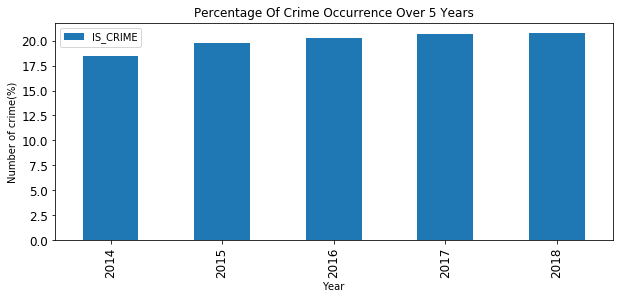

In [21]:
#Yearly Crime Percentage 

yearly_crime_rate=crime_dataset.groupby(crime_dataset['Crime_Date'].dt.year).count()

yearly_crime_rate_percnt=(yearly_crime_rate/len(crime_dataset)*100)

Yearly=yearly_crime_rate_percnt[['IS_CRIME']].plot(kind='bar',title ="Percentage Of Crime Occurrence Over 5 Years", figsize=(10,4), legend=True, fontsize=12)
Yearly.set_xlabel('Year')
Yearly.set_ylabel('Number of crime(%)')

plt.show()

#### Percentage Of Crime Occurrence Over 12 Months (Year=2018)

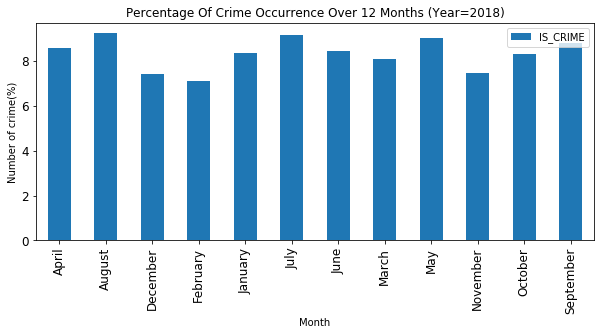

In [22]:
# Crime belongs to 2018

crime_2018=crime_dataset[crime_dataset['Crime_Date'].dt.year==2018]
monthly_crime_rate=crime_2018.groupby(crime_2018['Month']).count()

monthly_crime_rate_percnt=(monthly_crime_rate/len(crime_2018)*100)

monthly=monthly_crime_rate_percnt[['IS_CRIME']].plot(kind='bar',title ="Percentage Of Crime Occurrence Over 12 Months (Year=2018)", figsize=(10,4), legend=True, fontsize=12)
monthly.set_xlabel('Month')
monthly.set_ylabel('Number of crime(%)')

plt.show()


#### Percentage Of Crime Occurrence Over the week (Year=2018)

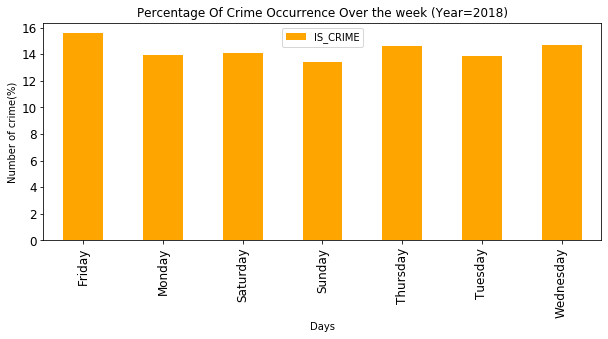

In [23]:
by_days_crime_rate=crime_2018.groupby(crime_2018['Crime_Day']).count()

by_days_crime_rate_percnt=(by_days_crime_rate/len(crime_2018)*100)

by_days=by_days_crime_rate_percnt[['IS_CRIME']].plot(kind='bar',title ="Percentage Of Crime Occurrence Over the week (Year=2018)", figsize=(10,4), legend=True, fontsize=12,color="orange")
by_days.set_xlabel('Days')
by_days.set_ylabel('Number of crime(%)')

plt.show()


#### Percentage Of Crime Occurrence Over 4 hours intervals (Year=2018)

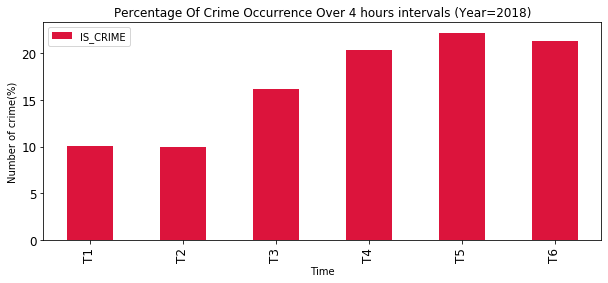

In [24]:
by_time_crime_rate=crime_2018.groupby(crime_2018['Crime_time']).count()

by_time_crime_rate_percnt=(by_time_crime_rate/len(crime_2018)*100)

by_time=by_time_crime_rate_percnt[['IS_CRIME']].plot(kind='bar',title ="Percentage Of Crime Occurrence Over 4 hours intervals (Year=2018)", figsize=(10,4), legend=True, fontsize=12,color="crimson")
by_time.set_xlabel('Time')
by_time.set_ylabel('Number of crime(%)')

plt.show()


#### Percentage Of Crime Occurrence Over 78 Neighborhood (Year=2018)

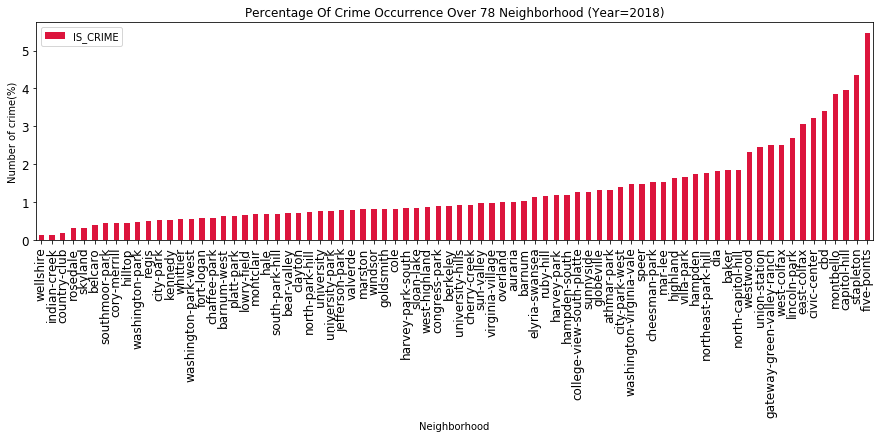

In [25]:
by_time_crime_rate=crime_2018.groupby(crime_2018['Crime_Location']).count()

by_time_crime_rate_percnt=(by_time_crime_rate/len(crime_2018)*100)
by_time_crime_rate_percnt=by_time_crime_rate_percnt.sort_values(by=['IS_CRIME'])
by_time=by_time_crime_rate_percnt[['IS_CRIME']].plot(kind='bar',title ="Percentage Of Crime Occurrence Over 78 Neighborhood (Year=2018)", figsize=(15,4), legend=True, fontsize=12,color="crimson")
by_time.set_xlabel('Neighborhood')
by_time.set_ylabel('Number of crime(%)')

plt.show()


#### Percentage of crimes over the days of the week in Denver(2018)

In [26]:
Theft=(crime_2018[(crime_2018.Crime_Type=="Theft") & (crime_2018.Crime_Day=="Sunday")].OFFENSE_CATEGORY_ID.count()*100/28018,
    crime_2018[(crime_2018.Crime_Type=="Theft") & (crime_2018.Crime_Day=="Monday")].OFFENSE_CATEGORY_ID.count()*100/28018,
    crime_2018[(crime_2018.Crime_Type=="Theft") & (crime_2018.Crime_Day=="Tuesday")].OFFENSE_CATEGORY_ID.count()*100/28018,
    crime_2018[(crime_2018.Crime_Type=="Theft") & (crime_2018.Crime_Day=="Wednesday")].OFFENSE_CATEGORY_ID.count()*100/28018,
    crime_2018[(crime_2018.Crime_Type=="Theft") & (crime_2018.Crime_Day=="Thursday")].OFFENSE_CATEGORY_ID.count()*100/28018,
    crime_2018[(crime_2018.Crime_Type=="Theft") & (crime_2018.Crime_Day=="Friday")].OFFENSE_CATEGORY_ID.count()*100/28018,
    crime_2018[(crime_2018.Crime_Type=="Theft") & (crime_2018.Crime_Day=="Saturday")].OFFENSE_CATEGORY_ID.count()*100/28018)

All_other_crimes=(crime_2018[(crime_2018.Crime_Type=="All other crimes") & (crime_2018.Crime_Day=="Sunday")].OFFENSE_CATEGORY_ID.count()*100/17613,
    crime_2018[(crime_2018.Crime_Type=="All other crimes") & (crime_2018.Crime_Day=="Monday")].OFFENSE_CATEGORY_ID.count()*100/17613,
    crime_2018[(crime_2018.Crime_Type=="All other crimes") & (crime_2018.Crime_Day=="Tuesday")].OFFENSE_CATEGORY_ID.count()*100/17613,
    crime_2018[(crime_2018.Crime_Type=="All other crimes") & (crime_2018.Crime_Day=="Wednesday")].OFFENSE_CATEGORY_ID.count()*100/17613,
    crime_2018[(crime_2018.Crime_Type=="All other crimes") & (crime_2018.Crime_Day=="Thursday")].OFFENSE_CATEGORY_ID.count()*100/17613,
    crime_2018[(crime_2018.Crime_Type=="All other crimes") & (crime_2018.Crime_Day=="Friday")].OFFENSE_CATEGORY_ID.count()*100/17613,
    crime_2018[(crime_2018.Crime_Type=="All other crimes") & (crime_2018.Crime_Day=="Saturday")].OFFENSE_CATEGORY_ID.count()*100/17613)


Drug_Alcohol=(crime_2018[(crime_2018.Crime_Type=="Drug/Alcohol") & (crime_2018.Crime_Day=="Sunday")].OFFENSE_CATEGORY_ID.count()*100/6132,
    crime_2018[(crime_2018.Crime_Type=="Drug/Alcohol") & (crime_2018.Crime_Day=="Monday")].OFFENSE_CATEGORY_ID.count()*100/6132,
    crime_2018[(crime_2018.Crime_Type=="Drug/Alcohol") & (crime_2018.Crime_Day=="Tuesday")].OFFENSE_CATEGORY_ID.count()*100/6132,
    crime_2018[(crime_2018.Crime_Type=="Drug/Alcohol") & (crime_2018.Crime_Day=="Wednesday")].OFFENSE_CATEGORY_ID.count()*100/6132,
    crime_2018[(crime_2018.Crime_Type=="Drug/Alcohol") & (crime_2018.Crime_Day=="Thursday")].OFFENSE_CATEGORY_ID.count()*100/6132,
    crime_2018[(crime_2018.Crime_Type=="Drug/Alcohol") & (crime_2018.Crime_Day=="Friday")].OFFENSE_CATEGORY_ID.count()*100/6132,
    crime_2018[(crime_2018.Crime_Type=="Drug/Alcohol") & (crime_2018.Crime_Day=="Saturday")].OFFENSE_CATEGORY_ID.count()*100/6132)

Assault=(crime_2018[(crime_2018.Crime_Type=="Assault") & (crime_2018.Crime_Day=="Sunday")].OFFENSE_CATEGORY_ID.count()*100/7538,
    crime_2018[(crime_2018.Crime_Type=="Assault") & (crime_2018.Crime_Day=="Monday")].OFFENSE_CATEGORY_ID.count()*100/7538,
    crime_2018[(crime_2018.Crime_Type=="Assault") & (crime_2018.Crime_Day=="Tuesday")].OFFENSE_CATEGORY_ID.count()*100/7538,
    crime_2018[(crime_2018.Crime_Type=="Assault") & (crime_2018.Crime_Day=="Wednesday")].OFFENSE_CATEGORY_ID.count()*100/7538,
    crime_2018[(crime_2018.Crime_Type=="Assault") & (crime_2018.Crime_Day=="Thursday")].OFFENSE_CATEGORY_ID.count()*100/7538,
    crime_2018[(crime_2018.Crime_Type=="Assault") & (crime_2018.Crime_Day=="Friday")].OFFENSE_CATEGORY_ID.count()*100/7538,
    crime_2018[(crime_2018.Crime_Type=="Assault") & (crime_2018.Crime_Day=="Saturday")].OFFENSE_CATEGORY_ID.count()*100/7538)

Public_Disorder=(crime_2018[(crime_2018.Crime_Type=="Public Disorder") & (crime_2018.Crime_Day=="Sunday")].OFFENSE_CATEGORY_ID.count()*100/8575,
    crime_2018[(crime_2018.Crime_Type=="Public Disorder") & (crime_2018.Crime_Day=="Monday")].OFFENSE_CATEGORY_ID.count()*100/8575,
    crime_2018[(crime_2018.Crime_Type=="Public Disorder") & (crime_2018.Crime_Day=="Tuesday")].OFFENSE_CATEGORY_ID.count()*100/8575,
    crime_2018[(crime_2018.Crime_Type=="Public Disorder") & (crime_2018.Crime_Day=="Wednesday")].OFFENSE_CATEGORY_ID.count()*100/8575,
    crime_2018[(crime_2018.Crime_Type=="Public Disorder") & (crime_2018.Crime_Day=="Thursday")].OFFENSE_CATEGORY_ID.count()*100/8575,
    crime_2018[(crime_2018.Crime_Type=="Public Disorder") & (crime_2018.Crime_Day=="Friday")].OFFENSE_CATEGORY_ID.count()*100/8575,
    crime_2018[(crime_2018.Crime_Type=="Public Disorder") & (crime_2018.Crime_Day=="Saturday")].OFFENSE_CATEGORY_ID.count()*100/8575)

White_collar_crime=(crime_2018[(crime_2018.Crime_Type=="White collar crime") & (crime_2018.Crime_Day=="Sunday")].OFFENSE_CATEGORY_ID.count()*100/1285,
    crime_2018[(crime_2018.Crime_Type=="White collar crime") & (crime_2018.Crime_Day=="Monday")].OFFENSE_CATEGORY_ID.count()*100/1285,
    crime_2018[(crime_2018.Crime_Type=="White collar crime") & (crime_2018.Crime_Day=="Tuesday")].OFFENSE_CATEGORY_ID.count()*100/1285,
    crime_2018[(crime_2018.Crime_Type=="White collar crime") & (crime_2018.Crime_Day=="Wednesday")].OFFENSE_CATEGORY_ID.count()*100/1285,
    crime_2018[(crime_2018.Crime_Type=="White collar crime") & (crime_2018.Crime_Day=="Thursday")].OFFENSE_CATEGORY_ID.count()*100/1285,
    crime_2018[(crime_2018.Crime_Type=="White collar crime") & (crime_2018.Crime_Day=="Friday")].OFFENSE_CATEGORY_ID.count()*100/1285,
    crime_2018[(crime_2018.Crime_Type=="White collar crime") & (crime_2018.Crime_Day=="Saturday")].OFFENSE_CATEGORY_ID.count()*100/1285)


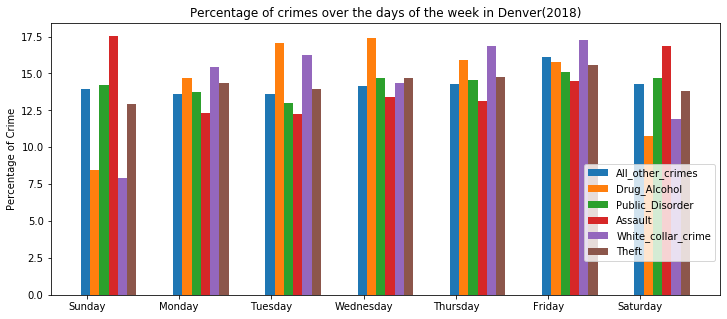

In [27]:
N=7

ind = np.arange(N)

plt.figure(figsize=(12, 5))
width =.1
plt.bar(ind, All_other_crimes, width, label='All_other_crimes')
plt.bar(ind + width, Drug_Alcohol, width,label='Drug_Alcohol')
plt.bar(ind + width+ width, Public_Disorder, width,label='Public_Disorder')
plt.bar(ind+ width+ width+ width, Assault, width, label='Assault')
plt.bar(ind + width+ width+ width+ width, White_collar_crime, width,label='White_collar_crime')
plt.bar(ind + width+ width+ width+ width+ width, Theft, width,label='Theft')


plt.ylabel('Percentage of Crime')
plt.title('Percentage of crimes over the days of the week in Denver(2018)')

plt.xticks(ind + width/7  , ('Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday','Friday','Saturday'))
plt.legend(loc='best', bbox_to_anchor=(0.5, 0, 0.5, 0.5))
plt.show()

#### Percentage of crimes over the 4 hours interval in Denvar(2018)

In [28]:
Theft=(crime_2018[(crime_2018.Crime_Type=="Theft") & (crime_2018.Crime_time=="T1")].OFFENSE_CATEGORY_ID.count()*100/28018,
    crime_2018[(crime_2018.Crime_Type=="Theft") & (crime_2018.Crime_time=="T2")].OFFENSE_CATEGORY_ID.count()*100/28018,
    crime_2018[(crime_2018.Crime_Type=="Theft") & (crime_2018.Crime_time=="T3")].OFFENSE_CATEGORY_ID.count()*100/28018,
    crime_2018[(crime_2018.Crime_Type=="Theft") & (crime_2018.Crime_time=="T4")].OFFENSE_CATEGORY_ID.count()*100/28018,
    crime_2018[(crime_2018.Crime_Type=="Theft") & (crime_2018.Crime_time=="T5")].OFFENSE_CATEGORY_ID.count()*100/28018,
    crime_2018[(crime_2018.Crime_Type=="Theft") & (crime_2018.Crime_time=="T6")].OFFENSE_CATEGORY_ID.count()*100/28018)

All_other_crimes=(crime_2018[(crime_2018.Crime_Type=="All other crimes") & (crime_2018.Crime_time=="T1")].OFFENSE_CATEGORY_ID.count()*100/17613,
    crime_2018[(crime_2018.Crime_Type=="All other crimes") & (crime_2018.Crime_time=="T2")].OFFENSE_CATEGORY_ID.count()*100/17613,
    crime_2018[(crime_2018.Crime_Type=="All other crimes") & (crime_2018.Crime_time=="T3")].OFFENSE_CATEGORY_ID.count()*100/17613,
    crime_2018[(crime_2018.Crime_Type=="All other crimes") & (crime_2018.Crime_time=="T4")].OFFENSE_CATEGORY_ID.count()*100/17613,
    crime_2018[(crime_2018.Crime_Type=="All other crimes") & (crime_2018.Crime_time=="T5")].OFFENSE_CATEGORY_ID.count()*100/17613,
    crime_2018[(crime_2018.Crime_Type=="All other crimes") & (crime_2018.Crime_time=="T6")].OFFENSE_CATEGORY_ID.count()*100/17613)


Drug_Alcohol=(crime_2018[(crime_2018.Crime_Type=="Drug/Alcohol") & (crime_2018.Crime_time=="T1")].OFFENSE_CATEGORY_ID.count()*100/6132,
    crime_2018[(crime_2018.Crime_Type=="Drug/Alcohol") & (crime_2018.Crime_time=="T2")].OFFENSE_CATEGORY_ID.count()*100/6132,
    crime_2018[(crime_2018.Crime_Type=="Drug/Alcohol") & (crime_2018.Crime_time=="T3")].OFFENSE_CATEGORY_ID.count()*100/6132,
    crime_2018[(crime_2018.Crime_Type=="Drug/Alcohol") & (crime_2018.Crime_time=="T4")].OFFENSE_CATEGORY_ID.count()*100/6132,
    crime_2018[(crime_2018.Crime_Type=="Drug/Alcohol") & (crime_2018.Crime_time=="T5")].OFFENSE_CATEGORY_ID.count()*100/6132,
    crime_2018[(crime_2018.Crime_Type=="Drug/Alcohol") & (crime_2018.Crime_time=="T6")].OFFENSE_CATEGORY_ID.count()*100/6132)

Assault=(crime_2018[(crime_2018.Crime_Type=="Assault") & (crime_2018.Crime_time=="T1")].OFFENSE_CATEGORY_ID.count()*100/7538,
    crime_2018[(crime_2018.Crime_Type=="Assault") & (crime_2018.Crime_time=="T2")].OFFENSE_CATEGORY_ID.count()*100/7538,
    crime_2018[(crime_2018.Crime_Type=="Assault") & (crime_2018.Crime_time=="T3")].OFFENSE_CATEGORY_ID.count()*100/7538,
    crime_2018[(crime_2018.Crime_Type=="Assault") & (crime_2018.Crime_time=="T4")].OFFENSE_CATEGORY_ID.count()*100/7538,
    crime_2018[(crime_2018.Crime_Type=="Assault") & (crime_2018.Crime_time=="T5")].OFFENSE_CATEGORY_ID.count()*100/7538,
    crime_2018[(crime_2018.Crime_Type=="Assault") & (crime_2018.Crime_time=="T6")].OFFENSE_CATEGORY_ID.count()*100/7538)

Public_Disorder=(crime_2018[(crime_2018.Crime_Type=="Public Disorder") & (crime_2018.Crime_time=="T1")].OFFENSE_CATEGORY_ID.count()*100/8575,
    crime_2018[(crime_2018.Crime_Type=="Public Disorder") & (crime_2018.Crime_time=="T2")].OFFENSE_CATEGORY_ID.count()*100/8575,
    crime_2018[(crime_2018.Crime_Type=="Public Disorder") & (crime_2018.Crime_time=="T3")].OFFENSE_CATEGORY_ID.count()*100/8575,
    crime_2018[(crime_2018.Crime_Type=="Public Disorder") & (crime_2018.Crime_time=="T4")].OFFENSE_CATEGORY_ID.count()*100/8575,
    crime_2018[(crime_2018.Crime_Type=="Public Disorder") & (crime_2018.Crime_time=="T5")].OFFENSE_CATEGORY_ID.count()*100/8575,
    crime_2018[(crime_2018.Crime_Type=="Public Disorder") & (crime_2018.Crime_time=="T6")].OFFENSE_CATEGORY_ID.count()*100/8575)

White_collar_crime=(crime_2018[(crime_2018.Crime_Type=="White collar crime") & (crime_2018.Crime_time=="T1")].OFFENSE_CATEGORY_ID.count()*100/1285,
    crime_2018[(crime_2018.Crime_Type=="White collar crime") & (crime_2018.Crime_time=="T2")].OFFENSE_CATEGORY_ID.count()*100/1285,
    crime_2018[(crime_2018.Crime_Type=="White collar crime") & (crime_2018.Crime_time=="T3")].OFFENSE_CATEGORY_ID.count()*100/1285,
    crime_2018[(crime_2018.Crime_Type=="White collar crime") & (crime_2018.Crime_time=="T4")].OFFENSE_CATEGORY_ID.count()*100/1285,
    crime_2018[(crime_2018.Crime_Type=="White collar crime") & (crime_2018.Crime_time=="T5")].OFFENSE_CATEGORY_ID.count()*100/1285,
    crime_2018[(crime_2018.Crime_Type=="White collar crime") & (crime_2018.Crime_time=="T6")].OFFENSE_CATEGORY_ID.count()*100/1285)

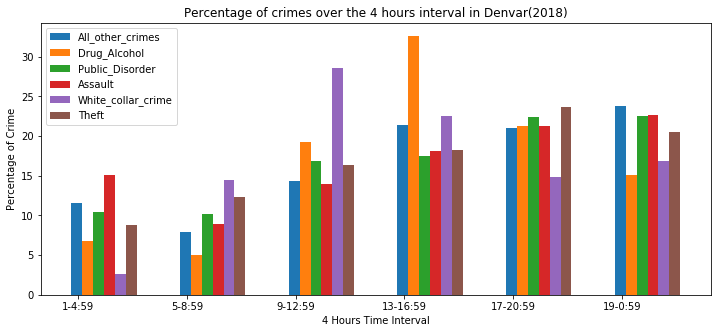

In [29]:
N=6

ind = np.arange(N)

plt.figure(figsize=(12, 5))
width =.1
plt.bar(ind, All_other_crimes, width, label='All_other_crimes')
plt.bar(ind + width, Drug_Alcohol, width,label='Drug_Alcohol')
plt.bar(ind + width+ width, Public_Disorder, width,label='Public_Disorder')
plt.bar(ind+ width+ width+ width, Assault, width, label='Assault')
plt.bar(ind + width+ width+ width+ width, White_collar_crime, width,label='White_collar_crime')
plt.bar(ind + width+ width+ width+ width+ width, Theft, width,label='Theft')


plt.ylabel('Percentage of Crime')
plt.xlabel('4 Hours Time Interval')
plt.title('Percentage of crimes over the 4 hours interval in Denvar(2018)')

plt.xticks(ind + width/7  , ('1-4:59', '5-8:59', '9-12:59', '13-16:59', '17-20:59','19-0:59'))
plt.legend(loc='upper left')
plt.show()

### Model Building

#### In order to extract frequent patterns from Denver, I applied the Apriori algorithm. Then I use Naive Bayesian classifier to build classification model for the dataset. The purpose of the classifier is to predict the potential crime type in a specific location within a particular time in the future. I aimed to examine every model then choose the model that gives the best accuracy in prediction.

### Apriori Algorithm

#### Apriori is one of the basic algorithms for mining frequent patterns. It scans the dataset to collect all itemsets that satisfy a predefined minimum support. My goal of using this model is to find all possible crime frequent patterns regardless of the committed crime type. I wanted to come up with a list of all crime hotspots along with its related frequent time. Hence, I implemented the algorithm on location and time features and excluded the crime type feature. Additionally, to obtain more frequent patterns I applied constraint-based mining by restricting the extraction process on the frequent patterns having this formula of three specific itemsets (Location, Day, Time).

In [30]:

crime_dataset_for_apriori=crime_dataset[['Crime_Location','Crime_Day','Crime_time']]

In [31]:
rows=len(crime_dataset_for_apriori)

transactions=[]
for i in range(1,rows):
    transactions.append([str(crime_dataset_for_apriori.values[i,j]) for j in range(0,3)])

In [32]:
from apyori import apriori

rules=apriori(transactions,min_support=0.0012,min_confidence=0.2)


In [33]:
result=list(rules)
result

[RelationRecord(items=frozenset({'T4'}), support=0.2008571102967197, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'T4'}), confidence=0.2008571102967197, lift=1.0)]),
 RelationRecord(items=frozenset({'T5'}), support=0.21941483778482873, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'T5'}), confidence=0.21941483778482873, lift=1.0)]),
 RelationRecord(items=frozenset({'T6'}), support=0.21825123108389363, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'T6'}), confidence=0.21825123108389363, lift=1.0)]),
 RelationRecord(items=frozenset({'T5', 'Friday'}), support=0.03516011588083228, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Friday'}), items_add=frozenset({'T5'}), confidence=0.2289799027362747, lift=1.0435935192351304)]),
 RelationRecord(items=frozenset({'Friday', 'T6'}), support=0.034608302393790896, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Friday'

### Naive Bayesian Classifier

#### Naive Bayesian classifier is a supervised learning algorithm, which is effective and widely used. It is a statistical model that predicts class membership probabilities based on Bayes’ theorem . It assumes the independent effect between attribute values. While our selected crime features have an independent effect on each other, this classifier was an ideal choice. 

#### P (H|X) = P (X|H) P (H)/ P (X)

In [34]:
crime_dataset_rev=crime_dataset

In [35]:
crime_dataset_rev=crime_dataset_rev.drop(['OFFENSE_CATEGORY_ID','Crime_Date','IS_CRIME'],axis=1)

In [36]:
crime_dataset_rev.head(2)

,Crime_Location,Month,Crime_Day,Crime_Type,Crime_Type_Id,Crime_time
0,montbello,June,Wednesday,All other crimes,3,T6
1,gateway-green-valley-ranch,October,Wednesday,Theft,5,T3


#### For naive Bayes, we need to convert all the data values in one format. We are going to encode all the labels with the value between 0 and n_classes-1. 

### One-Hot Encoder

#### For implementing this, we are going to use LabelEncoder of scikit learn library. For encoding, we can also use the One-Hot encoder. It encodes the data into binary format.

In [37]:
le = preprocessing.LabelEncoder()

Crime_Location_cat   = le.fit_transform(crime_dataset.Crime_Location)
Month_cat = le.fit_transform(crime_dataset.Month)
Crime_Day_cat = le.fit_transform(crime_dataset.Crime_Day)
Crime_Type_cat = le.fit_transform(crime_dataset.Crime_Type)
Crime_time_cat = le.fit_transform(crime_dataset.Crime_time)


In [38]:
#initialize the encoded categorical columns

crime_dataset_rev['Crime_Location_cat'] = Crime_Location_cat
crime_dataset_rev['Month_cat'] = Month_cat
crime_dataset_rev['Crime_Day_cat'] = Crime_Day_cat
crime_dataset_rev['Crime_Type_cat'] = Crime_Type_cat
crime_dataset_rev['Crime_time_cat'] = Crime_time_cat

In [39]:
#drop the old categorical columns from dataframe
dummy_fields = ['Crime_Location', 
                  'Month', 'Crime_Day',
                  'Crime_Type','Crime_time',]
crime_dataset_rev = crime_dataset_rev.drop(dummy_fields, axis = 1)

In [40]:
crime_dataset_rev = crime_dataset_rev.reindex(['Crime_Location_cat','Month_cat', 'Crime_Day_cat',
                                               'Crime_Type_cat', 'Crime_time_cat','Crime_Type_Id'], axis= 1)
 
crime_dataset_rev.head(1)

,Crime_Location_cat,Month_cat,Crime_Day_cat,Crime_Type_cat,Crime_time_cat,Crime_Type_Id
0,44,6,6,0,5,3


### Standardization of Data

#### All the data values of our dataframe are numeric. Now, we need to convert them on a single scale. We can standardize the values.

In [41]:
num_features = ['Crime_Location_cat', 'Month_cat', 'Crime_Day_cat', 'Crime_Type_cat',
                'Crime_time_cat']

scaled_features = {}
for each in num_features:
    mean, std = crime_dataset_rev[each].mean(), crime_dataset_rev[each].std()
    scaled_features[each] = [mean, std]
    crime_dataset_rev.loc[:, each] = (crime_dataset_rev[each] - mean)/std

### Data Slicing

#### Let’s split the data into training and test set. We can easily perform this step using sklearn’s train_test_split() method.

In [42]:
features = crime_dataset_rev.values[:,:5]
target = crime_dataset_rev.values[:,5]
features_train, features_test, target_train, target_test = train_test_split(features,
                                                                            target, test_size = 0.2, random_state = 42)

### Gaussian Naive Bayes Implementation
#### It’s time to implement machine learning algorithm on it. We are going to use sklearn’s GaussianNB module.

In [43]:
clf = GaussianNB()
clf.fit(features_train, target_train)
target_pred = clf.predict(features_test)

In [44]:
print(target_pred)

['1' '5' '5' ... '5' '3' '4']


#### Accuracy of our Gaussian Naive Bayes model It’s time to test the quality of our model. We have made some predictions. Let’s compare the model’s prediction with actual target values for the test set. By following this method, we are going to calculate the accuracy of our model.

In [45]:
accuracy_score(target_test, target_pred, normalize = True)

1.0

#### Awesome! Our model is giving an accuracy of 100%.